# **ML models (Random Forest, Boosted Regression Trees, Decision Tree, Linear Regression, SVM, KNN model)**

Import libraries

In [37]:
import pandas as pnds_
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as pyplt

In [38]:
propertiesDataset = pnds_.read_csv("properties_data.csv")

In [39]:
propertiesDataset.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [40]:
X = propertiesDataset.drop(['id', 'price'], axis=1)
y = propertiesDataset['price']
X = pnds_.get_dummies(X, drop_first=True)

Split the data

In [41]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
setScaler = StandardScaler()
trainX_Scaled = setScaler.fit_transform(trainX)
testX_Scaled = setScaler.transform(testX)

ML models (Random Forest, Boosted Regression Trees, Decision Tree, Linear Regression, SVM, KNN model)

In [43]:
Six_ML_models_init_ = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Boosted Regression Trees': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor()
}
saveResults = {'Model': [], 'R2 Score': []}

Train and evaluate each model

In [44]:
for ModelName, m in Six_ML_models_init_.items():
    print(f"Training {ModelName}")
    m.fit(trainX_Scaled, trainY)
    predY = m.predict(testX_Scaled)
    # Calculate R-squared (R2) score
    Cal_r2 = r2_score(testY, predY)
    saveResults['Model'].append(ModelName)
    saveResults['R2 Score'].append(Cal_r2)
    print(f"{ModelName} - R-squared (R2) Score: {Cal_r2}")
    print("----------------------------------------------")

Training Random Forest
Random Forest - R-squared (R2) Score: 0.9870379331458984
----------------------------------------------
Training Boosted Regression Trees
Boosted Regression Trees - R-squared (R2) Score: 0.9870900071580457
----------------------------------------------
Training Decision Tree
Decision Tree - R-squared (R2) Score: 0.9879108229621802
----------------------------------------------
Training Linear Regression
Linear Regression - R-squared (R2) Score: 0.8994577276160165
----------------------------------------------
Training SVM
SVM - R-squared (R2) Score: -0.03102496307179492
----------------------------------------------
Training KNN
KNN - R-squared (R2) Score: 0.8073096533759166
----------------------------------------------


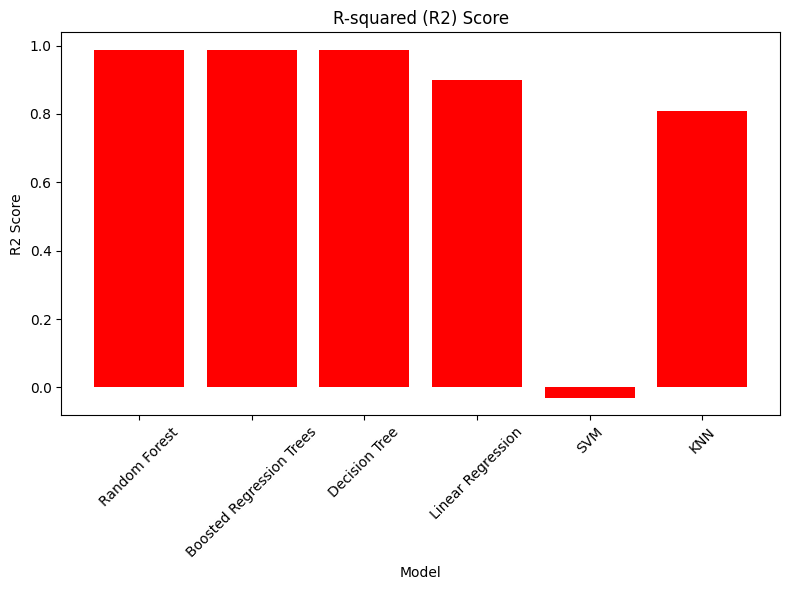

In [45]:
saveResults_df = pnds_.DataFrame(saveResults)
pyplt.figure(figsize=(8, 6))
# R-squared (R2) score plot
pyplt.bar(saveResults_df['Model'], saveResults_df['R2 Score'], color='red')
pyplt.xlabel('Model')
pyplt.ylabel('R2 Score')
pyplt.title('R-squared (R2) Score')
pyplt.xticks(rotation=45)
pyplt.tight_layout()
pyplt.show()
